#### Probability Ratio Encoding
1. Probability of Survived based on Cabin---> Categorical Feature
2. Probability of Not Survived=1-pr(Survived)
3. pr(Survived)/pr(Not Survived)
4. Dictonary to map cabin with probability
5. replace with the categorical feature
6. Here this is the way how we r converting Categorical Feature to Numerical.

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('titanic.csv',usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [3]:
### Replacing
df['Cabin'].fillna('Missing',inplace=True)
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [4]:
df['Cabin'].unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [5]:
df['Cabin'].astype(str).str[0]

0      M
1      C
2      M
3      C
4      M
      ..
886    M
887    B
888    M
889    C
890    M
Name: Cabin, Length: 891, dtype: object

In [6]:
df['Cabin']=df['Cabin'].astype(str).str[0]
df

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M
...,...,...
886,0,M
887,1,B
888,0,M
889,1,C


In [7]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [8]:
df.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [9]:
prob_df=df.groupby(['Cabin'])['Survived'].mean()

In [10]:
prob_df=pd.DataFrame(prob_df)
prob_df

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
M,0.299854
T,0.000000


In [11]:
prob_df['Died']=1-prob_df['Survived'] #In probability p+q=1. So p=1-q. Here is survived and q is not survived.

In [12]:
prob_df

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000
F,0.615385,0.384615
G,0.500000,0.500000
M,0.299854,0.700146
T,0.000000,1.000000


In [13]:
prob_df.head() #Remember tht sum of this things will always be 1.

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000


In [14]:
#In order to find Probability_ratio
prob_df['Probability_ratio']=prob_df['Survived']/prob_df['Died'] #I will be able to get Probabilty ratio encoding.
prob_df.head()

,Survived,Died,Probability_ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000


In [15]:
prob_df['Probability_ratio'].to_dict()

{'A': 0.875,
 'B': 2.916666666666666,
 'C': 1.4583333333333333,
 'D': 3.125,
 'E': 3.0,
 'F': 1.6000000000000003,
 'G': 1.0,
 'M': 0.42827442827442824,
 'T': 0.0}

In [16]:
probability_encoded=prob_df['Probability_ratio'].to_dict()

In [17]:
df['Cabin_encoded']=df['Cabin'].map(probability_encoded)
df.head()

,Survived,Cabin,Cabin_encoded
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274


In [18]:
df.head(20)

,Survived,Cabin,Cabin_encoded
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274
5,0,M,0.428274
6,0,E,3.000000
7,0,M,0.428274
8,1,M,0.428274
9,1,M,0.428274


#### Types Of Transformation
1. Normalization And Standardization
2. Scaling to Minimum And Maximum values
3. Scaling To Median And Quantiles
4. Guassian Transformation
5. Logarithmic Transformation
6. Reciprocal Trnasformation
7. Square Root Transformation
8. Exponential Trnasformation
9. Box Cox Transformation

## Standardization

In [19]:
import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['Pclass','Age','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [20]:
df['Age'].isnull().sum()

177

In [21]:
df.Age.median()

28.0

In [22]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [23]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [25]:
#EXAMPLE
from sklearn.preprocessing import StandardScaler
import statistics
data = [[1, 2], [3, 4], [5, 6]]
dataa=[1,2,3,4,5]
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data (calculate mean and standard deviation)
s=scaler.fit(data)
print(s)

mean = statistics.mean(dataa)
print(mean)

# Transform the data (center and scale)
scaled_data = scaler.transform(data)

# Print the original and scaled data
print("Original data:", data)
print("Scaled data:", scaled_data)

StandardScaler()
3
Original data: [[1, 2], [3, 4], [5, 6]]
Scaled data: [[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]


In [26]:
#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler

In [31]:
df

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500
...,...,...,...,...
886,0,2,27.0,13.0000
887,1,1,19.0,30.0000
888,0,3,28.0,23.4500
889,1,1,26.0,30.0000


In [27]:
scaler=StandardScaler() #Here we r creating object for StandardScaler()
#Whenever u r applying machine learning algorithm u do only fit
### fit vs fit_transform

df_scaled=scaler.fit_transform(df)

In [28]:
df_scaled 

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

In [29]:
pd.DataFrame(df_scaled) 
#Here we standardized or scaled the data which has mean close to 0 and standard deviation close to 1 after calculating the below data or shown in graph.
#Transformation will happen feature wise it will not be taking row wise.

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
pd.DataFrame(df_scaled) 

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


In [40]:
df_scaled[1]

array([ 1.2669898 , -1.56610693,  0.66386103,  0.78684529])

In [37]:
df_scaled[0]

array([-0.78927234,  0.82737724, -0.56573646, -0.50244517])

In [38]:
df_scaled[2]

array([ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426])

In [35]:
len(df_scaled[1])

4

In [41]:
df_scaled[:,0]

array([-0.78927234,  1.2669898 ,  1.2669898 ,  1.2669898 , -0.78927234,
       -0.78927234, -0.78927234, -0.78927234,  1.2669898 ,  1.2669898 ,
        1.2669898 ,  1.2669898 , -0.78927234, -0.78927234, -0.78927234,
        1.2669898 , -0.78927234,  1.2669898 , -0.78927234,  1.2669898 ,
       -0.78927234,  1.2669898 ,  1.2669898 ,  1.2669898 , -0.78927234,
        1.2669898 , -0.78927234, -0.78927234,  1.2669898 , -0.78927234,
       -0.78927234,  1.2669898 ,  1.2669898 , -0.78927234, -0.78927234,
       -0.78927234,  1.2669898 , -0.78927234, -0.78927234,  1.2669898 ,
       -0.78927234, -0.78927234, -0.78927234,  1.2669898 ,  1.2669898 ,
       -0.78927234, -0.78927234,  1.2669898 , -0.78927234, -0.78927234,
       -0.78927234, -0.78927234,  1.2669898 ,  1.2669898 , -0.78927234,
        1.2669898 ,  1.2669898 , -0.78927234,  1.2669898 , -0.78927234,
       -0.78927234,  1.2669898 , -0.78927234, -0.78927234, -0.78927234,
        1.2669898 ,  1.2669898 , -0.78927234,  1.2669898 , -0.78

In [42]:
len(df_scaled[:,0])

891

In [32]:
df_scaled[:,1]

array([ 0.82737724, -1.56610693,  0.82737724, -1.56610693,  0.82737724,
        0.82737724, -1.56610693,  0.82737724,  0.82737724, -0.36936484,
        0.82737724, -1.56610693,  0.82737724,  0.82737724,  0.82737724,
       -0.36936484,  0.82737724, -0.36936484,  0.82737724,  0.82737724,
       -0.36936484, -0.36936484,  0.82737724, -1.56610693,  0.82737724,
        0.82737724,  0.82737724, -1.56610693,  0.82737724,  0.82737724,
       -1.56610693, -1.56610693,  0.82737724, -0.36936484, -1.56610693,
       -1.56610693,  0.82737724,  0.82737724,  0.82737724,  0.82737724,
        0.82737724, -0.36936484,  0.82737724, -0.36936484,  0.82737724,
        0.82737724,  0.82737724,  0.82737724,  0.82737724,  0.82737724,
        0.82737724,  0.82737724, -1.56610693, -0.36936484, -1.56610693,
       -1.56610693, -0.36936484,  0.82737724, -0.36936484,  0.82737724,
        0.82737724, -1.56610693, -1.56610693,  0.82737724, -1.56610693,
        0.82737724, -0.36936484,  0.82737724,  0.82737724,  0.82

In [34]:
len(df_scaled[:,1])

891

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <BarContainer object of 20 artists>)

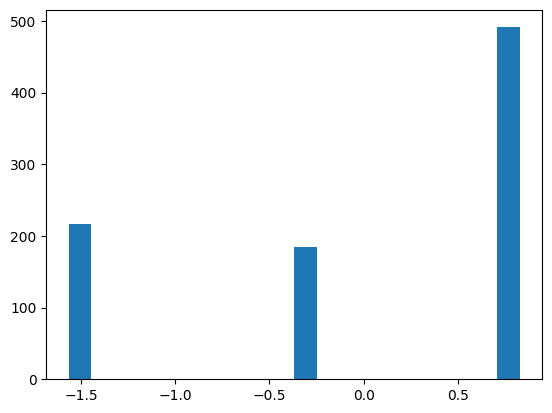

In [43]:
plt.hist(df_scaled[:,1],bins=20)

In [47]:
df_scaled[:,2]

array([-0.56573646,  0.66386103, -0.25833709,  0.4333115 ,  0.4333115 ,
       -0.1046374 ,  1.89345853, -2.10273333, -0.18148724, -1.18053521,
       -1.94903364,  2.2008579 , -0.71943615,  0.74071088, -1.18053521,
        1.97030837, -2.10273333, -0.1046374 ,  0.12591213, -0.1046374 ,
        0.4333115 ,  0.35646166, -1.10368536, -0.1046374 , -1.64163427,
        0.66386103, -0.1046374 , -0.79628599, -0.1046374 , -0.1046374 ,
        0.81756072, -0.1046374 , -0.1046374 ,  2.81565665, -0.1046374 ,
        0.97126041, -0.1046374 , -0.6425863 , -0.87313583, -1.18053521,
        0.81756072, -0.18148724, -0.1046374 , -2.02588348, -0.79628599,
       -0.1046374 , -0.1046374 , -0.1046374 , -0.1046374 , -0.87313583,
       -1.71848411, -0.6425863 ,  1.50920931, -0.02778756,  2.7388068 ,
       -0.1046374 , -0.6425863 , -0.06621248, -1.8721838 , -1.41108474,
       -0.56573646,  0.66386103,  1.20180994, -1.94903364, -0.1046374 ,
       -0.1046374 , -0.02778756, -0.79628599, -0.94998568, -0.25

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <BarContainer object of 20 artists>)

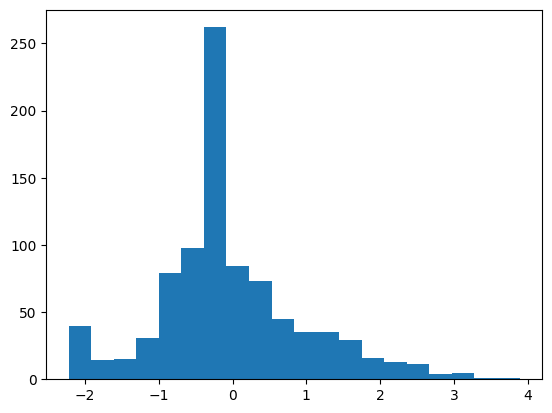

In [44]:
plt.hist(df_scaled[:,2],bins=20) #Age is also my second feature.
#IN this graph u have a better gaaussian distributed 
#the reason is  that we replaced missing NaN with the mean or median 

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <BarContainer object of 20 artists>)

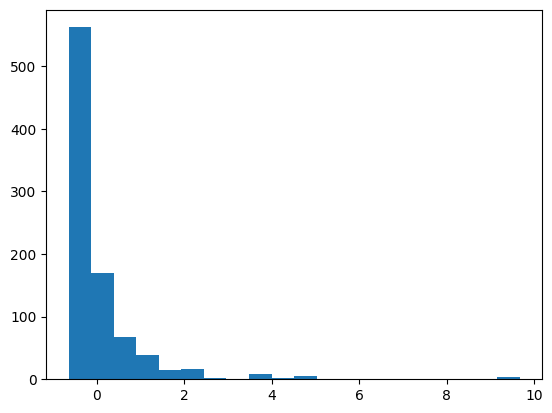

In [48]:
plt.hist(df_scaled[:,3],bins=20) #If u check w.r.t Fare
#It is Right skewed.
#Since there is a lot outliers in Fare so the transformation is starting somewhere btw -0.5 till 10
#If there are outliers then there will be impact ono the transformation.

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <BarContainer object of 20 artists>)

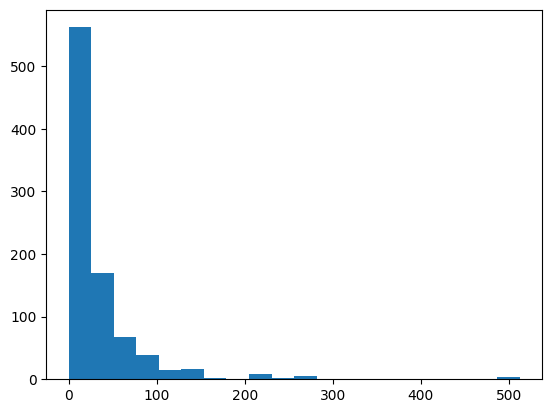

In [49]:
plt.hist(df['Fare'],bins=20) #This orginal Fare looks like similar when compared to transformed data.
#See this it is also left skewed

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <BarContainer object of 20 artists>)

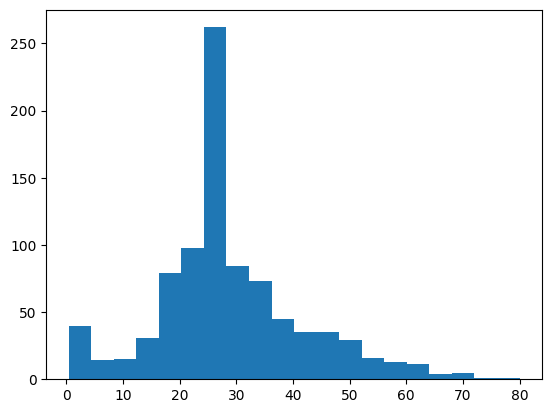

In [50]:
plt.hist(df['Age'],bins=20)

##### Min Max Scaling  (Widely used in CNN)---Deep Learning Techniques
* Min Max Scaling scales(Transforms) the values between 0 to 1.
* X_scaled = (X - X.min / (X.max - X.min)
* X is a feature it will take each and every point and subtract with X.min value and then divided by (X.max - X.min)
* It works well with CNN. In Machine Learning also ppl use this but wht they prefer is standard scaler. Coz standard scaling helps u to find out center median value which is jst like Guassian Distribution(The normal distribution is also known as a Gaussian distribution). So it will definetly help u out. But in case if u have outliers at tht time It may get impacted somewhat.
* For Normal Distribution u can definetly use standard scaler.

In [51]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(df),columns=df.columns)
df_minmax.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

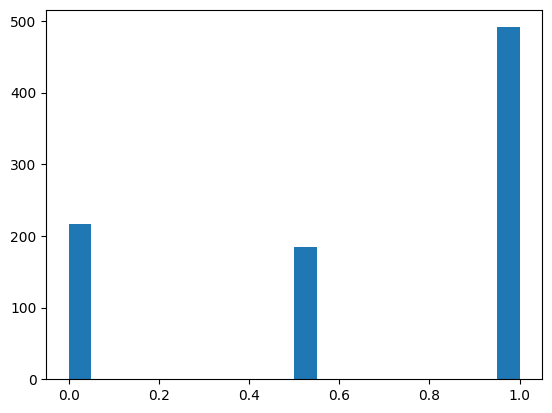

In [52]:
plt.hist(df_minmax['Pclass'],bins=20)
#Remember each and every values will be converted into 0-1. Survived column need not be converted coz the values r either 0 or 1. So here there will not be any kind of impact w.r.t Pclass. 

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

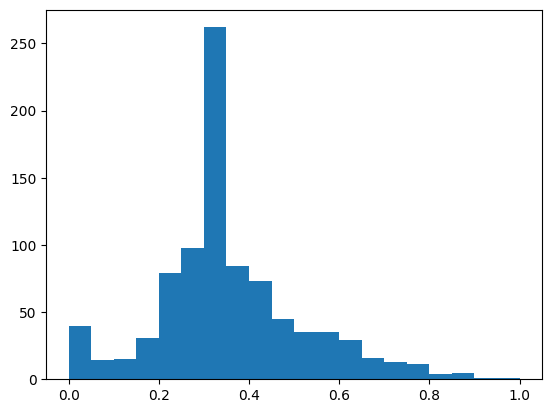

In [53]:
plt.hist(df_minmax['Age'],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

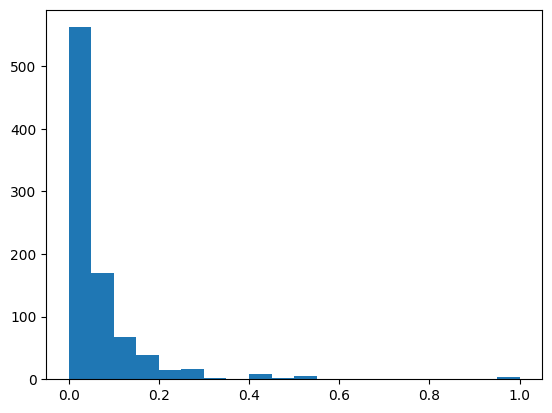

In [54]:
plt.hist(df_minmax['Fare'],bins=20)

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

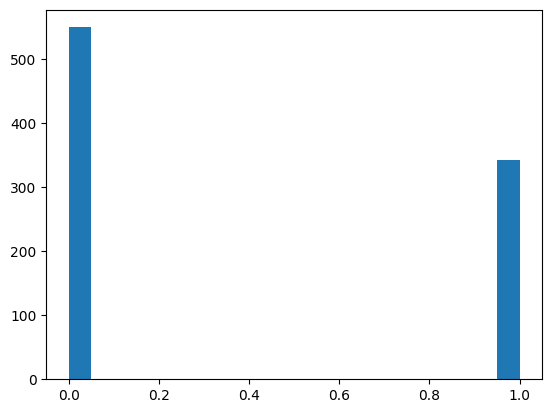

In [55]:
plt.hist(df_minmax['Survived'],bins=20)

##### Robust Scaler
It is used to scale the feature to median and quantiles
Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

0,1,2,3,4,5,6,7,8,9,10.

*If u want to know the Qunatile of 9 so it is 90th percentile.

9-90 percentile---90% of all values in this group is less than 9
1-10 precentile---10% of all values in this group is less than 1
4-40%

*If u want to find 75th percentile then it is around 7.5-2.5(75th quantile - 25th quantile)

In [56]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_robust_scaler=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_robust_scaler.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.12153846, -1.81546154, -1.50938462, -1.20330769, -0.89723077,
        -0.59115385, -0.28507692,  0.021     ,  0.32707692,  0.63315385,
         0.93923077,  1.24530769,  1.55138462,  1.85746154,  2.16353846,
         2.46961538,  2.77569231,  3.08176923,  3.38784615,  3.69392308,
         4.        ]),
 <BarContainer object of 20 artists>)

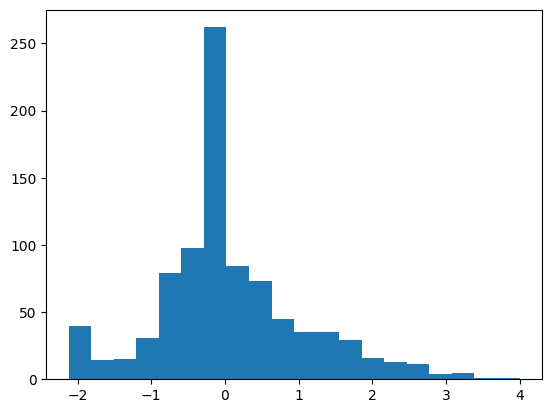

In [57]:
plt.hist(df_robust_scaler['Age'],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.62600478,  0.48343237,  1.59286952,  2.70230667,  3.81174382,
         4.92118096,  6.03061811,  7.14005526,  8.24949241,  9.35892956,
        10.46836671, 11.57780386, 12.68724101, 13.79667816, 14.90611531,
        16.01555246, 17.12498961, 18.23442675, 19.3438639 , 20.45330105,
        21.5627382 ]),
 <BarContainer object of 20 artists>)

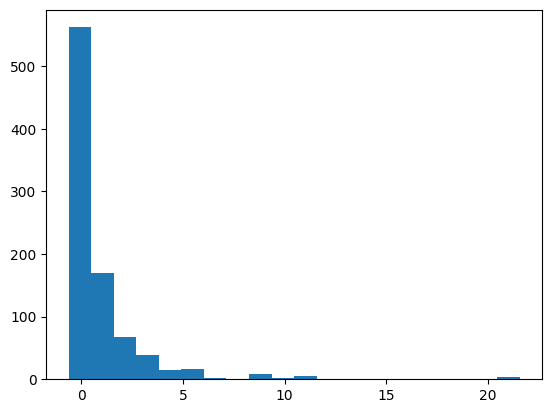

In [58]:
plt.hist(df_robust_scaler['Fare'],bins=20)

## Guassian Transformation

Some machine learning algorithms like linear and logistic assume that the features are normally distributed. 

There are some of the ML Algorithms tht they require all the features in normally distributed so that they can perform well w.r.t accuracy(they will give us very good result) and performance.

*Guassian Distributed means Normal Distributed. If u r distribution is not normally distributed so we can apply some mathematical equations on those tht kind of distribution and then convert tht into Guassian Distribution for that we use Guassian Distribution. 

*The above Age graph is Normally distributed.

*Suppose u take the above graph which is Left Skewed('Fare') and this is not Normally Distributed then How can I convert that into normally distributed. SO there are various techniques.

-Accuracy
-Performance
- logarithmic transformation
- reciprocal transformation
- square root transformation
- exponential transformation (more general, you can use any exponent)
- boxcox transformation


In [60]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [61]:
df['Age'].median()

28.0

In [62]:
### fillnan
df['Age']=df['Age'].fillna(df['Age'].median()) #If i use median then it will actually reduce the outliers

In [63]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [64]:
import scipy.stats as stat
import pylab 

In [65]:
#### If you want to check whether feature is guassian or normal distributed. What technique we use is Q-Q plot
# This is pretty famous plot to check whether the data is Guassian distributed 
#### Q-Q plot
#Now we basically show my distribution on the left in hostogram. On the right it will basically draw a Q-Q plot for tht i use subplot()
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab) #If u really want to apply Q-Q plot der will be a library which u need to import(import scipy.stats as stat)  
    plt.show()
    

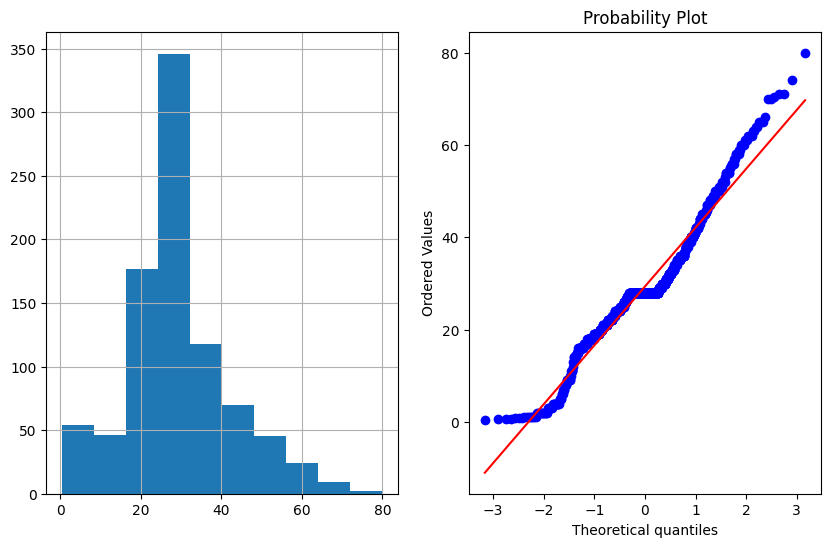

In [66]:
plot_data(df,'Age') 
#df[feature] is my X-axis value & we probably need a Y-axis value coz we will try to plot X and Y and then we will see whether all the points fall in a straight line or not. 
# So in the Y-axis we basically use a normally distributed data which gets intialized by this particular function.
# So tht Y data will be plotted in ur X-axis and in Y-axis you will be basically haaving tht Particular feature. 
#Remember If all this points r falling in the straight line we can say tht 'Age' is Guassian Distributed.
#In y-axis it is the real values of Age.

#### Logarithmic Transformation

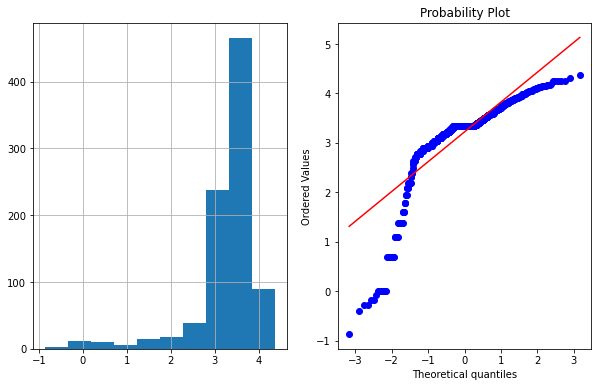

In [37]:
import numpy as np
df['Age_log']=np.log(df['Age'])
plot_data(df,'Age_log') 
#After applying 'Logarithmic Transformation' it is not falling in the straight line so definitly I cannot use 'LT' to make it Guassian Distributed.
# Hence this is not tht suitable. So now we try the other techniques.
#In y-axis the values are df['Age_reciprocal']

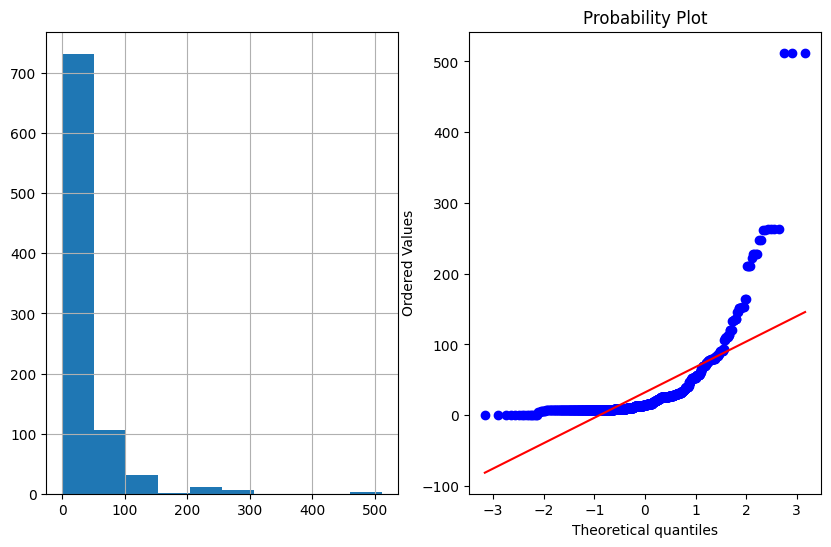

In [71]:
plot_data(df,'Fare') #It is right skewed

In [74]:
np.log(df['Fare'])

c:\program files\python38\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0      1.981001
1      4.266662
2      2.070022
3      3.972177
4      2.085672
         ...   
886    2.564949
887    3.401197
888    3.154870
889    3.401197
890    2.047693
Name: Fare, Length: 891, dtype: float64

c:\program files\python38\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: supplied range of [-inf, 6.238967387173662] is not finite

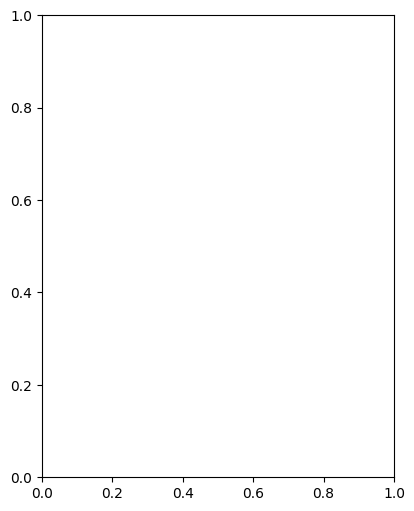

In [73]:
import numpy as np
df['Fare_log']=np.log(df['Fare'])
plot_data(df,'Fare_log') 

#### Reciprocal Trnasformation

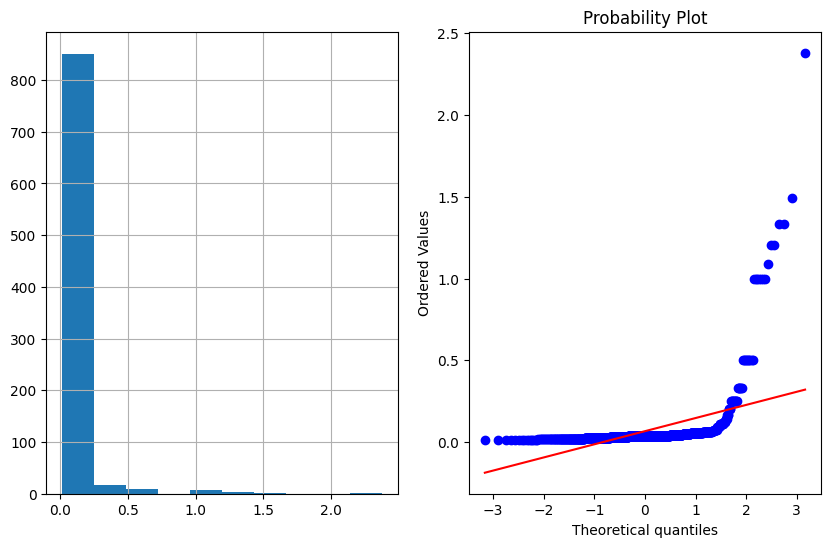

In [67]:
df['Age_reciprocal']=1/df.Age
plot_data(df,'Age_reciprocal') #It is right skewed 

In [69]:
df.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [68]:
df['Age_reciprocal'] #(1/22=0.045455)

0      0.045455
1      0.026316
2      0.038462
3      0.028571
4      0.028571
         ...   
886    0.037037
887    0.052632
888    0.035714
889    0.038462
890    0.031250
Name: Age_reciprocal, Length: 891, dtype: float64

## Square Root Transformation

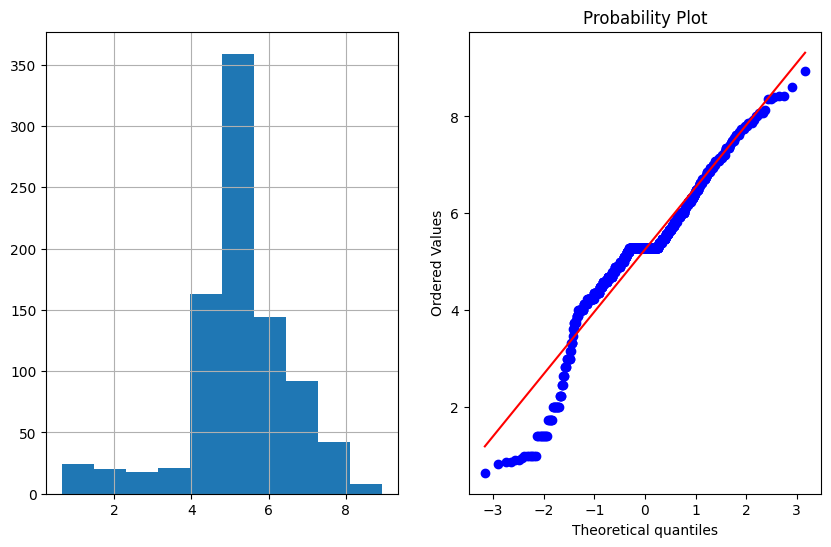

In [75]:
##### Square Root Transformation
df['Age_sqaure']=df.Age**(1/2)
plot_data(df,'Age_sqaure')

## Exponential Transdormation

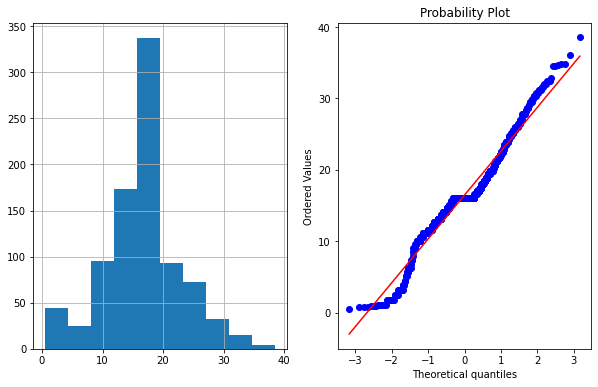

In [44]:
#### Exponential Transdormation
df['Age_exponential']=df.Age**(1/1.2) #U can vary the exponent as needed.
plot_data(df,'Age_exponential')

#### BoxCOx Transformation
The Box-Cox transformation is defined as: 

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ  are considered and the optimal value for a given variable is selected.

In [79]:
stat.boxcox(df['Age']) #Array has len=2

(array([13.468119  , 21.4987284 , 15.56341683, 20.05611014, 20.05611014,
        16.58601436, 28.84746463,  0.92513402, 16.07664335,  9.01695462,
         2.53193075, 30.6104327 , 12.39181078, 21.97437834,  9.01695462,
        29.29062758,  0.92513402, 16.58601436, 18.09258499, 16.58601436,
        20.05611014, 19.56971919,  9.59722218, 16.58601436,  5.32265694,
        21.4987284 , 16.58601436, 11.84551333, 16.58601436, 16.58601436,
        22.44755196, 16.58601436, 16.58601436, 34.06447944, 16.58601436,
        23.38676361, 16.58601436, 12.93257404, 11.29332892,  9.01695462,
        22.44755196, 16.07664335, 16.58601436,  1.75636071, 11.84551333,
        16.58601436, 16.58601436, 16.58601436, 16.58601436, 11.29332892,
         4.65897047, 12.93257404, 26.60575762, 17.09169505, 33.6375945 ,
        16.58601436, 12.93257404, 16.83930618,  3.26857952,  7.221786  ,
        13.468119  , 21.4987284 , 24.77874367,  2.53193075, 16.58601436,
        16.58601436, 17.09169505, 11.84551333, 10.7

In [82]:
len(stat.boxcox(df['Age']))

2

In [80]:
df['Age_Boxcox'],parameters=stat.boxcox(df['Age'])

In [81]:
print(parameters)

0.7964531473656952


In [83]:
df['Age_Boxcox']

0      13.468119
1      21.498728
2      15.563417
3      20.056110
4      20.056110
         ...    
886    16.076643
887    11.845513
888    16.586014
889    15.563417
890    18.588067
Name: Age_Boxcox, Length: 891, dtype: float64

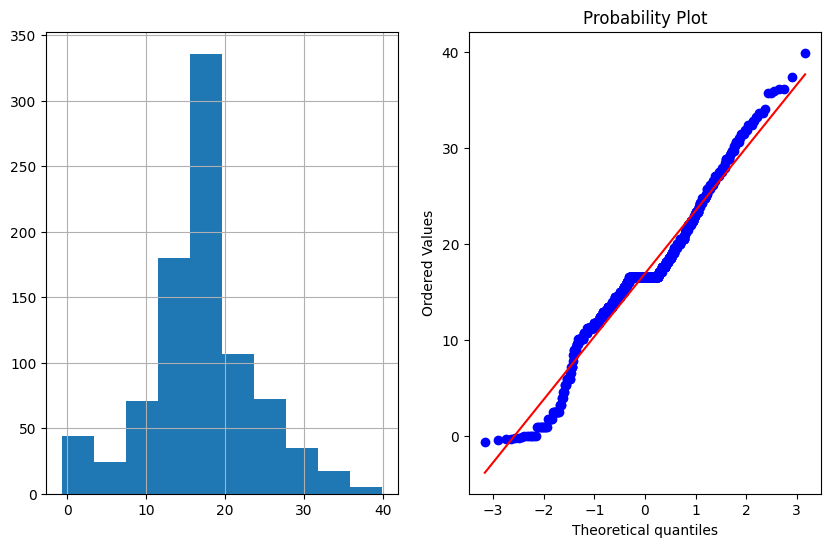

In [84]:
plot_data(df,'Age_Boxcox') #It is transformed very good.

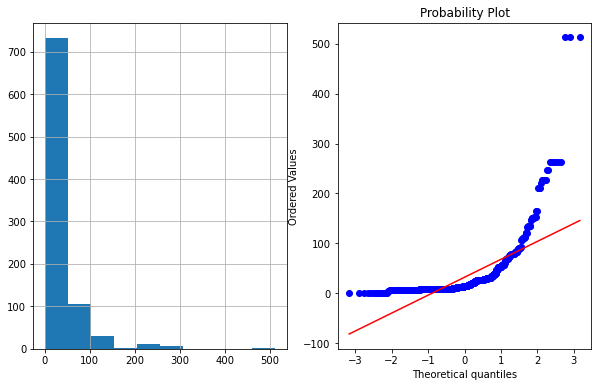

In [51]:
plot_data(df,'Fare') #Hence it is right skewed

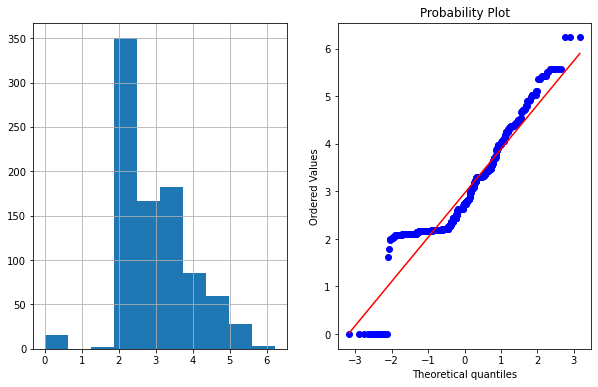

In [50]:
#### Fare
df['Fare_log']=np.log1p(df['Fare']) #After applying this Log Transformation for right skewed it is falling into the same straight line in Q-Q plot 
plot_data(df,'Fare_log')

In [86]:
df['Fare_Boxcox'],parameters=stat.boxcox(df['Fare']) #Data must be positive values
plot_data(df,'Fare_Boxcox')

ValueError: Data must be positive.

In [90]:
df['Fare'].head(50)

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
5       8.4583
6      51.8625
7      21.0750
8      11.1333
9      30.0708
10     16.7000
11     26.5500
12      8.0500
13     31.2750
14      7.8542
15     16.0000
16     29.1250
17     13.0000
18     18.0000
19      7.2250
20     26.0000
21     13.0000
22      8.0292
23     35.5000
24     21.0750
25     31.3875
26      7.2250
27    263.0000
28      7.8792
29      7.8958
30     27.7208
31    146.5208
32      7.7500
33     10.5000
34     82.1708
35     52.0000
36      7.2292
37      8.0500
38     18.0000
39     11.2417
40      9.4750
41     21.0000
42      7.8958
43     41.5792
44      7.8792
45      8.0500
46     15.5000
47      7.7500
48     21.6792
49     17.8000
Name: Fare, dtype: float64

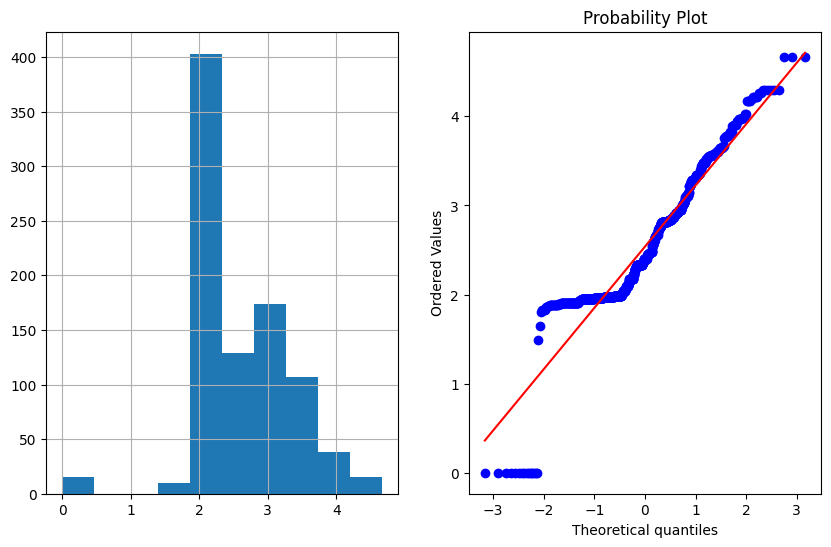

In [85]:
df['Fare_Boxcox'],parameters=stat.boxcox(df['Fare']+1) #Data must be positive values that's y we added 1 to it.
# Because probably we r getting -ve values after dng the Boxcox transformation that's we are adding 1 to it.
#Whenever u get that kind of error jst add plus 1 to it to do a Boxcox transformation.  
plot_data(df,'Fare_Boxcox')

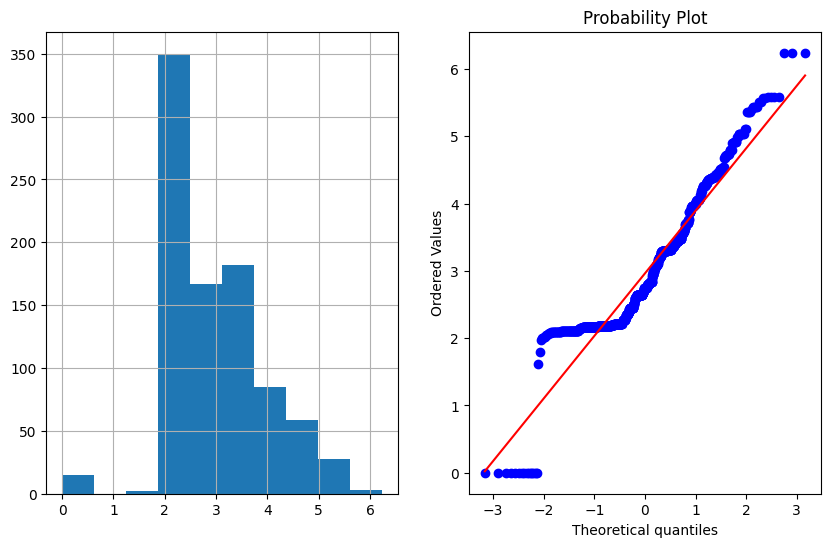

In [91]:
df['Fare_log']=np.log(df['Fare']+1) #After applying this Log Transformation for right skewed it is falling into the same straight line in Q-Q plot 
plot_data(df,'Fare_log')